# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [3]:
cities

['college',
 'talnakh',
 'stanley',
 'dunedin',
 "tisul'",
 'hobyo',
 'iskateley',
 'ushuaia',
 'port blair',
 'badger',
 'kurchum',
 'tiksi',
 'fale old settlement',
 'port-aux-francais',
 'isafjordur',
 'kruisfontein',
 'adamstown',
 'uberlandia',
 'vilyuysk',
 'olonkinbyen',
 'ribeira grande',
 'bredasdorp',
 'taiohae',
 'east ballina',
 'codrington',
 'nova sintra',
 'hithadhoo',
 'amahai',
 'vila velha',
 'blackmans bay',
 'puerto natales',
 'balapur',
 'lagunas',
 'sala',
 'mount gambier',
 'port alfred',
 'hami',
 'margaret river',
 'yellowknife',
 'lepsy',
 'taltal',
 'narrabri',
 'bethel',
 "sol'tsy",
 'placido de castro',
 'qaqortoq',
 'itoman',
 'horta',
 'albany',
 'cabo san lucas',
 'gwanda',
 'villa elisa',
 'whitehorse',
 'san clemente',
 'bonthe',
 'grytviken',
 'yermentau',
 'saint-joseph',
 'bardai',
 'longyearbyen',
 'richards bay',
 'hawaiian paradise park',
 'new norfolk',
 'phan rang-thap cham',
 'sur',
 'iqaluit',
 'mayya',
 'punta arenas',
 'santa elena de uaire

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = f"{url}appid={weather_api_key}&units={units}&q=iqaluit"

city_weather = requests.get(city_url).json()

        

In [5]:
city_weather

{'coord': {'lon': -68.5145, 'lat': 63.7506},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 10.85,
  'feels_like': 9.61,
  'temp_min': 10.85,
  'temp_max': 10.85,
  'pressure': 1007,
  'humidity': 62,
  'sea_level': 1007,
  'grnd_level': 1002},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 150},
 'clouds': {'all': 20},
 'dt': 1723068286,
 'sys': {'type': 1,
  'id': 797,
  'country': 'CA',
  'sunrise': 1723017903,
  'sunset': 1723079672},
 'timezone': -14400,
 'id': 5983720,
 'name': 'Iqaluit',
 'cod': 200}

In [ ]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#city_lat = city_weather['coord']['lat']
#print(city_lat)
#city_lng = city_weather['coord']['lon']
#city_max_temp = city_weather['main']['temp_max']
#city_humidity = city_weather['main']['humidity']
#city_clouds = city_weather['clouds']['all']
#city_wind = city_weather['wind']['speed']
#city_country = city_weather['sys']['country']
#city_date = city_weather['dt']

In [ ]:
#print(city_lng)
#print(city_max_temp) 
#print(city_humidity) 
#print(city_clouds)
#print(city_wind) 
#print(city_country)
#print(city_date)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | tisul'
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | kurchum
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | fale old settlement
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | uberlandia
Processing Record 19 of Set 1 | vilyuysk
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23

Processing Record 42 of Set 4 | rio claro
Processing Record 43 of Set 4 | howard springs
Processing Record 44 of Set 4 | ar ruways
Processing Record 45 of Set 4 | waiuku
Processing Record 46 of Set 4 | turkestan
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | belmonte
Processing Record 49 of Set 4 | mukah
City not found. Skipping...
Processing Record 0 of Set 5 | lihue
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | alva
Processing Record 6 of Set 5 | hereford
Processing Record 7 of Set 5 | kotel'nich
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | namibe
Processing Record 10 of Set 5 | isangel
Processing Record 11 of Set 5 | utrik
Processing Record 12 of Set 5 | malazgirt
Processing Record 13 of Set 5 | oriximina
Processing Record 14 of Set 5 | paungde
Processing Record 15 of Set 5 | as sulayyil
Proces

Processing Record 32 of Set 8 | tarko-sale
Processing Record 33 of Set 8 | vernon
Processing Record 34 of Set 8 | castillos
Processing Record 35 of Set 8 | dahab
Processing Record 36 of Set 8 | tionk essil
Processing Record 37 of Set 8 | anadarko
Processing Record 38 of Set 8 | shahr-e babak
Processing Record 39 of Set 8 | harper
Processing Record 40 of Set 8 | yaiza
Processing Record 41 of Set 8 | raychikhinsk
Processing Record 42 of Set 8 | tynda
Processing Record 43 of Set 8 | vorkuta
Processing Record 44 of Set 8 | esperanza
Processing Record 45 of Set 8 | forest
Processing Record 46 of Set 8 | sao miguel do araguaia
Processing Record 47 of Set 8 | taradale
Processing Record 48 of Set 8 | slave lake
Processing Record 49 of Set 8 | northport
Processing Record 0 of Set 9 | veymandoo
City not found. Skipping...
Processing Record 1 of Set 9 | ciudad bolivar
Processing Record 2 of Set 9 | topolobampo
Processing Record 3 of Set 9 | wisconsin rapids
Processing Record 4 of Set 9 | rio san 

Processing Record 20 of Set 12 | bedford
Processing Record 21 of Set 12 | shimoda
Processing Record 22 of Set 12 | kimbe
Processing Record 23 of Set 12 | oral
Processing Record 24 of Set 12 | singkil
Processing Record 25 of Set 12 | keta
Processing Record 26 of Set 12 | khovd
Processing Record 27 of Set 12 | himatnagar
Processing Record 28 of Set 12 | dejen
Processing Record 29 of Set 12 | betio village
Processing Record 30 of Set 12 | juneau
Processing Record 31 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 12 | at taj
Processing Record 33 of Set 12 | messini
Processing Record 34 of Set 12 | kotlas
Processing Record 35 of Set 12 | antalaha
Processing Record 36 of Set 12 | naryn
Processing Record 37 of Set 12 | fougamou
Processing Record 38 of Set 12 | ghat
Processing Record 39 of Set 12 | markaz-e woluswali-ye achin
Processing Record 40 of Set 12 | nguigmi
Processing Record 41 of Set 12 | jauharabad
Processing Record 42 of Set 12 | sao joao da ba

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,25.18,51,75,1.54,US,1723068440
1,talnakh,69.4865,88.3972,9.11,74,0,3.24,RU,1723068441
2,stanley,54.8680,-1.6985,14.29,81,20,2.57,GB,1723068442
3,dunedin,-45.8742,170.5036,9.33,81,100,0.89,NZ,1723068443
4,tisul',55.7611,88.3122,15.34,96,57,3.09,RU,1723068444


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,25.18,51,75,1.54,US,1723068440
1,talnakh,69.4865,88.3972,9.11,74,0,3.24,RU,1723068441
2,stanley,54.8680,-1.6985,14.29,81,20,2.57,GB,1723068442
3,dunedin,-45.8742,170.5036,9.33,81,100,0.89,NZ,1723068443
4,tisul',55.7611,88.3122,15.34,96,57,3.09,RU,1723068444


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,25.18,51,75,1.54,US,1723068440
1,talnakh,69.4865,88.3972,9.11,74,0,3.24,RU,1723068441
2,stanley,54.8680,-1.6985,14.29,81,20,2.57,GB,1723068442
3,dunedin,-45.8742,170.5036,9.33,81,100,0.89,NZ,1723068443
4,tisul',55.7611,88.3122,15.34,96,57,3.09,RU,1723068444
...,...,...,...,...,...,...,...,...,...
570,mejit,10.2753,170.8646,27.77,78,92,3.70,MH,1723069126
571,ca mau,9.1769,105.1500,25.17,89,32,1.34,VN,1723069127
572,kismayo,-0.3582,42.5454,24.68,80,100,6.69,SO,1723069128


In [12]:
city_data_df['Date_new'] = pd.to_datetime(city_data_df['Date'])
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_new
City_ID,,,,,,,,,,
0,college,64.8569,-147.8028,25.18,51,75,1.54,US,1723068440,1970-01-01 00:00:01.723068440
1,talnakh,69.4865,88.3972,9.11,74,0,3.24,RU,1723068441,1970-01-01 00:00:01.723068441
2,stanley,54.8680,-1.6985,14.29,81,20,2.57,GB,1723068442,1970-01-01 00:00:01.723068442
3,dunedin,-45.8742,170.5036,9.33,81,100,0.89,NZ,1723068443,1970-01-01 00:00:01.723068443
4,tisul',55.7611,88.3122,15.34,96,57,3.09,RU,1723068444,1970-01-01 00:00:01.723068444
...,...,...,...,...,...,...,...,...,...,...
570,mejit,10.2753,170.8646,27.77,78,92,3.70,MH,1723069126,1970-01-01 00:00:01.723069126
571,ca mau,9.1769,105.1500,25.17,89,32,1.34,VN,1723069127,1970-01-01 00:00:01.723069127
572,kismayo,-0.3582,42.5454,24.68,80,100,6.69,SO,1723069128,1970-01-01 00:00:01.723069128


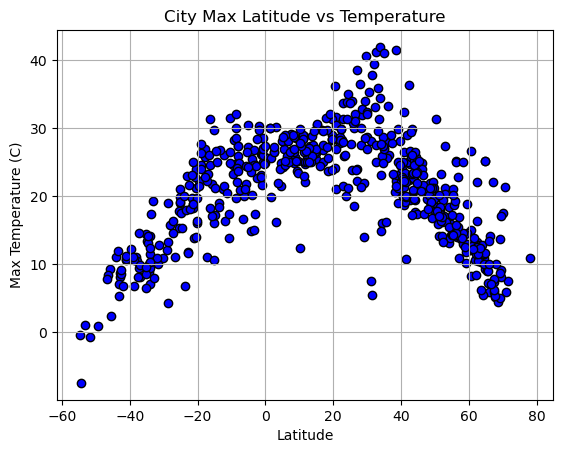

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Max Temperature (C)")
plt.title(f"City Max Latitude vs Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

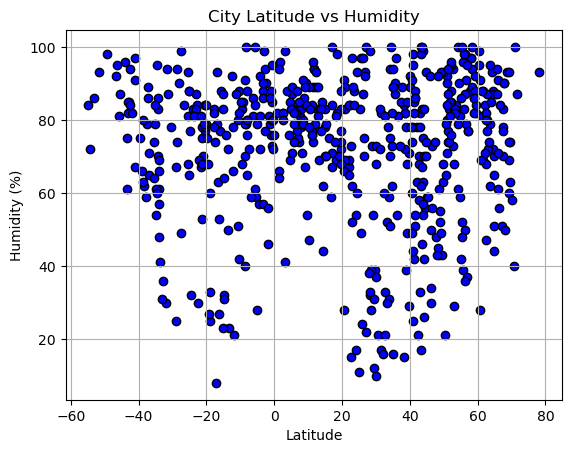

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

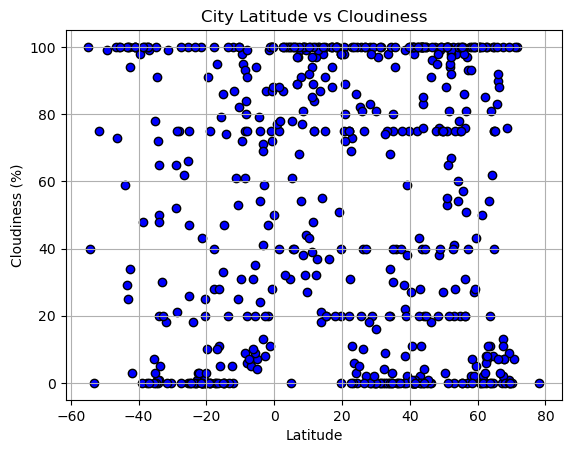

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

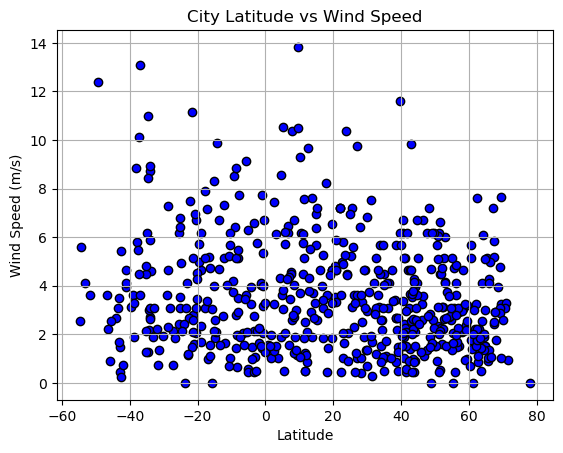

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_regression_line(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plotting the actual points as scatter plot
    plt.scatter(x_values, y_values, marker="o", facecolors="blue")
    # plotting the regression line
    plt.plot(x_values,regress_values,"r-")
    # adding labels
    plt.annotate(line_eq,(0,5),fontsize=15,color="red")
    print(f"The r^2-value is: {rvalue**2}")
      

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_new
City_ID,,,,,,,,,,
0,college,64.8569,-147.8028,25.18,51,75,1.54,US,1723068440,1970-01-01 00:00:01.723068440
1,talnakh,69.4865,88.3972,9.11,74,0,3.24,RU,1723068441,1970-01-01 00:00:01.723068441
2,stanley,54.8680,-1.6985,14.29,81,20,2.57,GB,1723068442,1970-01-01 00:00:01.723068442
4,tisul',55.7611,88.3122,15.34,96,57,3.09,RU,1723068444,1970-01-01 00:00:01.723068444
5,hobyo,5.3505,48.5268,24.31,87,100,10.54,SO,1723068065,1970-01-01 00:00:01.723068065


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date_new
City_ID,,,,,,,,,,
3,dunedin,-45.8742,170.5036,9.33,81,100,0.89,NZ,1723068443,1970-01-01 00:00:01.723068443
7,ushuaia,-54.8000,-68.3000,-0.48,84,100,2.56,AR,1723068448,1970-01-01 00:00:01.723068448
12,fale old settlement,-9.3852,-171.2468,28.22,68,98,8.50,TK,1723068453,1970-01-01 00:00:01.723068453
13,port-aux-francais,-49.3500,70.2167,0.94,98,99,12.40,TF,1723068455,1970-01-01 00:00:01.723068455
15,kruisfontein,-34.0033,24.7314,11.45,48,1,2.70,ZA,1723068242,1970-01-01 00:00:01.723068242


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.46586037524063667


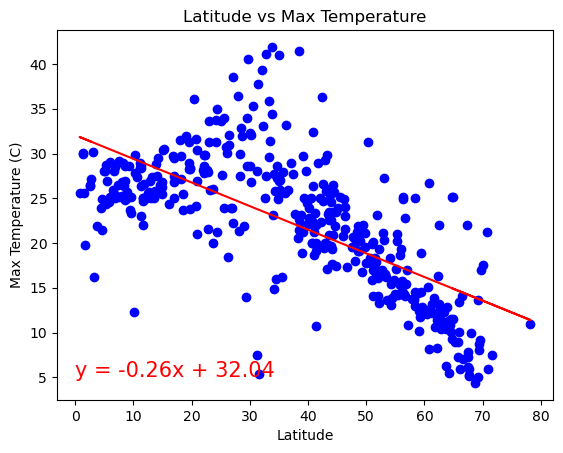

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs Max Temperature')

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()


The r^2-value is: 0.7044577436989923


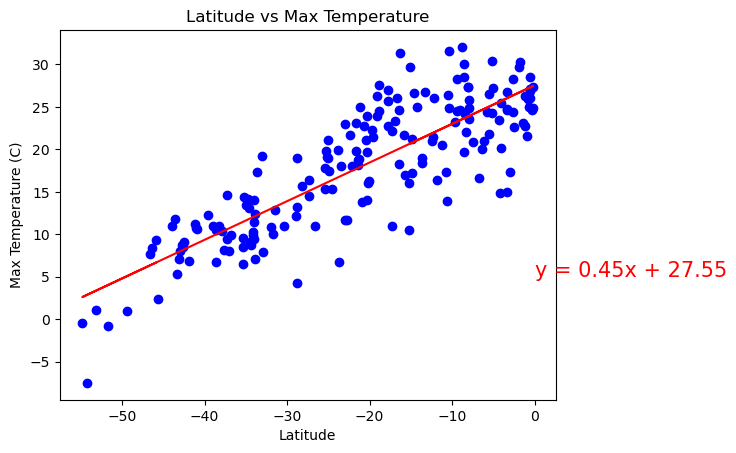

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Max Temperature (C)")
plt.title(f"Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Based on the r^2 values from the linear regression for the Temperature dependency to Latitude, it can be concluded that the linear relationship is strong for the Southern Hemisphere cities. In regards to the Northen Hemisphere cities, this relationship is moderate. It can also be observed on both data sets that the Temperature has a trend to increase in the direction of the Equatorial Latitudes. This tendency can be better observed in the full data set plot (Fig1.png).

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 4.275319229828644e-05


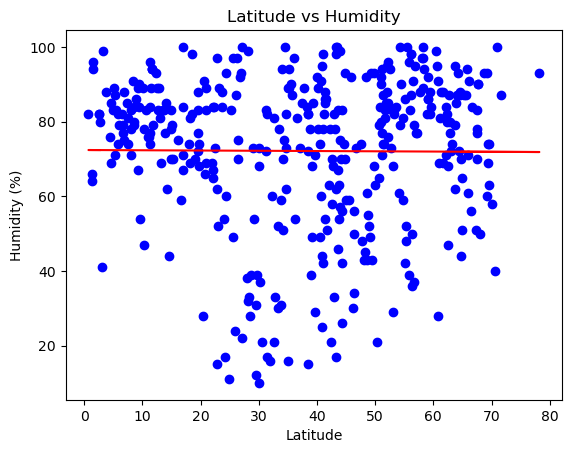

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Humidity (%)")
plt.title(f"Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r^2-value is: 0.0028755580648868817


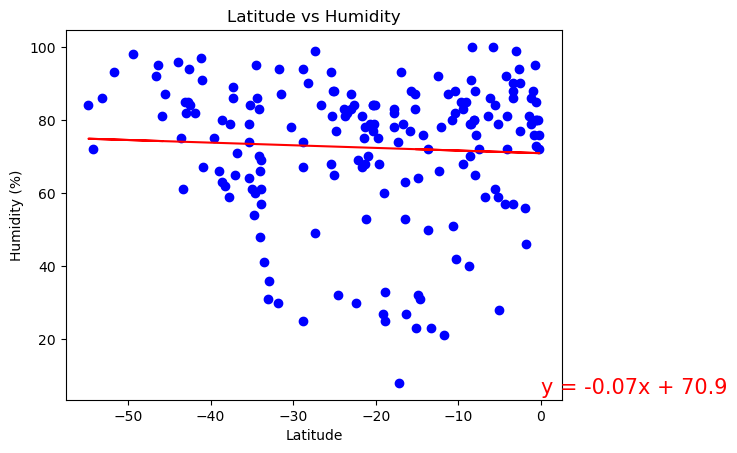

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(f"Humidity (%)")
plt.title(f"Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Based on the r^2 values from the linear regression for the Humidity dependency to Latitude, it can be concluded that there is no relationship for either Hemisphere data set. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.048597019766254385


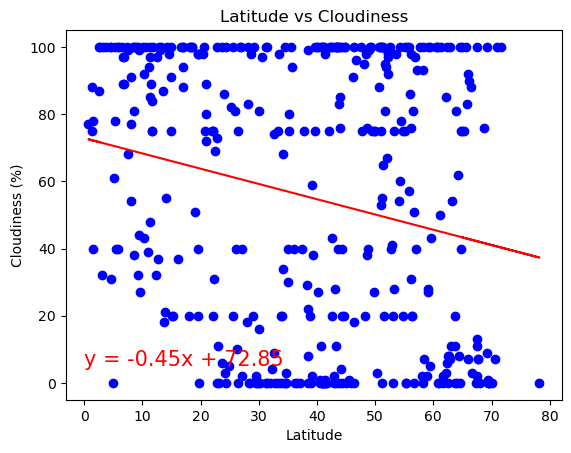

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness')


# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()


The r^2-value is: 0.001732827364892188


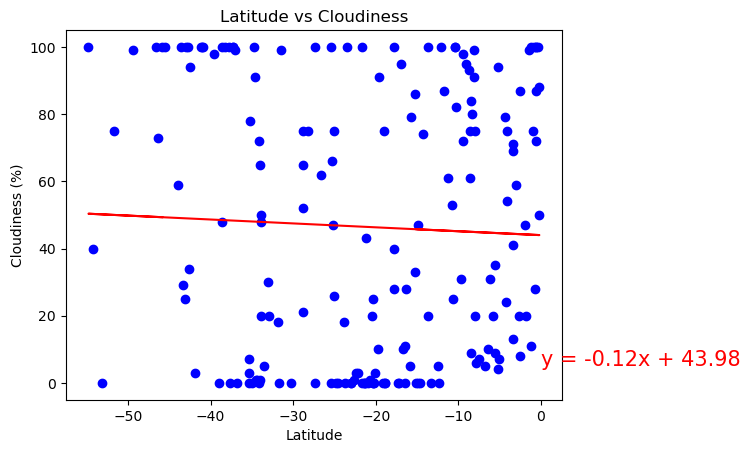

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness')


# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Based on the r^2 values from the linear regression for the Cloudiness dependency to Latitude, it can be concluded that there is no relationship for either Hemisphere data set. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.04703250582641298


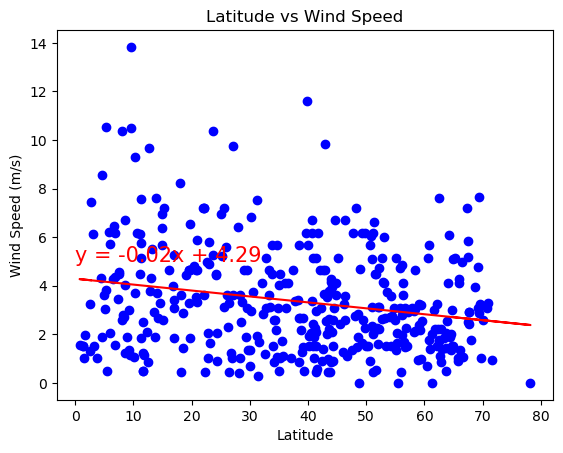

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_regression_line(x_values, y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r^2-value is: 0.0058741337708667785


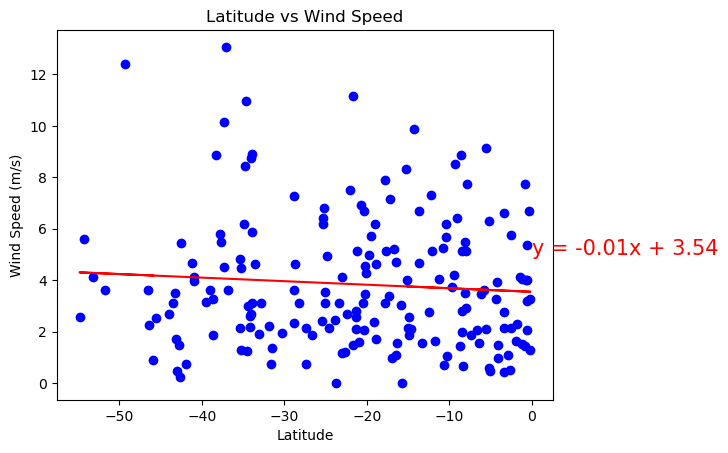

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_regression_line(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Based on the r^2 values from the linear regression for the Wind Speed dependency to Latitude, it can be concluded that there is no relationship for either Hemisphere data set. 